In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem

In [2]:
df = pd.read_csv('tox21.csv')
df

,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,mol_id,smiles
0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,TOX3021,CCOc1ccc2nc(S(N)(=O)=O)sc2c1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3020,CCN1C(=O)NC(c2ccccc2)C1=O
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,TOX3024,CC[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H]...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3027,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX20800,CC(O)(P(=O)(O)O)P(=O)(O)O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,TOX2725,CCOc1nc2cccc(C(=O)O)c2n1Cc1ccc(-c2ccccc2-c2nnn...
7827,1.0,1.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,TOX2370,CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(...
7828,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,TOX2371,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...
7829,1.0,1.0,0.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,TOX2377,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CC[C...


In [3]:
df.isnull().sum()

NR-AR             566
NR-AR-LBD        1073
NR-AhR           1282
NR-Aromatase     2010
NR-ER            1638
NR-ER-LBD         876
NR-PPAR-gamma    1381
SR-ARE           1999
SR-ATAD5          759
SR-HSE           1364
SR-MMP           2021
SR-p53           1057
mol_id              0
smiles              0
dtype: int64

In [4]:
df = df.dropna(subset=['NR-AhR']).copy()
df.isnull().sum()

NR-AR              89
NR-AR-LBD         466
NR-AhR              0
NR-Aromatase     1220
NR-ER             924
NR-ER-LBD         314
NR-PPAR-gamma     726
SR-ARE           1586
SR-ATAD5          207
SR-HSE           1121
SR-MMP           1315
SR-p53            469
mol_id              0
smiles              0
dtype: int64

In [5]:
df['mol'] = df['smiles'].apply(Chem.MolFromSmiles)
df.head()

[18:49:08] WARNING: not removing hydrogen atom without neighbors
[18:49:08] Explicit valence for atom # 3 Al, 6, is greater than permitted
[18:49:08] Explicit valence for atom # 4 Al, 6, is greater than permitted
[18:49:08] Explicit valence for atom # 4 Al, 6, is greater than permitted
[18:49:09] Explicit valence for atom # 9 Al, 6, is greater than permitted
[18:49:09] Explicit valence for atom # 5 Al, 6, is greater than permitted
[18:49:09] Explicit valence for atom # 16 Al, 6, is greater than permitted
[18:49:09] Explicit valence for atom # 20 Al, 6, is greater than permitted


,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,mol_id,smiles,mol
0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,TOX3021,CCOc1ccc2nc(S(N)(=O)=O)sc2c1,<rdkit.Chem.rdchem.Mol object at 0x7f051b7ae180>
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3020,CCN1C(=O)NC(c2ccccc2)C1=O,<rdkit.Chem.rdchem.Mol object at 0x7f051b7ae490>
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3027,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C,<rdkit.Chem.rdchem.Mol object at 0x7f051b7adc40>
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX20800,CC(O)(P(=O)(O)O)P(=O)(O)O,<rdkit.Chem.rdchem.Mol object at 0x7f051b7adcb0>
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,TOX5110,CC(C)(C)OOC(C)(C)CCC(C)(C)OOC(C)(C)C,<rdkit.Chem.rdchem.Mol object at 0x7f051b7adaf0>


In [6]:
df.isnull().sum()

NR-AR              89
NR-AR-LBD         466
NR-AhR              0
NR-Aromatase     1220
NR-ER             924
NR-ER-LBD         314
NR-PPAR-gamma     726
SR-ARE           1586
SR-ATAD5          207
SR-HSE           1121
SR-MMP           1315
SR-p53            469
mol_id              0
smiles              0
mol                 7
dtype: int64

In [7]:
df = df.dropna(subset=['mol']).copy()
df_data = df.drop(['mol', 'smiles', 'mol_id'], axis=1)
df_data_forPlot = df_data.isnull().sum().reset_index()
df_data_forPlot.columns = ['Toxicity_type', 'NumOfNull']

In [8]:
display(df_data_forPlot)

,Toxicity_type,NumOfNull
0,NR-AR,89
1,NR-AR-LBD,466
2,NR-AhR,0
3,NR-Aromatase,1219
4,NR-ER,924
5,NR-ER-LBD,314
6,NR-PPAR-gamma,726
7,SR-ARE,1585
8,SR-ATAD5,207
9,SR-HSE,1120


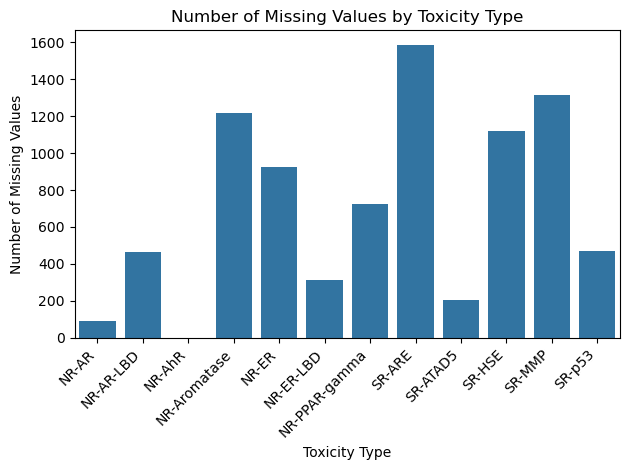

In [9]:
# making a bar plot to show the data
import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar plot
sns.barplot(data=df_data_forPlot, x='Toxicity_type', y='NumOfNull')

# Customize
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.title('Number of Missing Values by Toxicity Type')
plt.xlabel('Toxicity Type')
plt.ylabel('Number of Missing Values')
plt.tight_layout()
plt.show()

In [10]:
df['fingerprint'] = df['mol'].apply(AllChem.RDKFingerprint)
df['fingerprint_string'] = df['fingerprint'].apply(lambda x: x.ToBitString())
df

,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,mol_id,smiles,mol,fingerprint,fingerprint_string
0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,TOX3021,CCOc1ccc2nc(S(N)(=O)=O)sc2c1,<rdkit.Chem.rdchem.Mol object at 0x7f051b7ae180>,"[1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",1011110000100000010101010100001101100010100010...
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3020,CCN1C(=O)NC(c2ccccc2)C1=O,<rdkit.Chem.rdchem.Mol object at 0x7f051b7ae490>,"[0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, ...",0000110010100010101000000000011010001000000110...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3027,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C,<rdkit.Chem.rdchem.Mol object at 0x7f051b7adc40>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...",0000000000010101110010110001000000010000001000...
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX20800,CC(O)(P(=O)(O)O)P(=O)(O)O,<rdkit.Chem.rdchem.Mol object at 0x7f051b7adcb0>,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",0010000000001000000000100000000000000100010000...
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,TOX5110,CC(C)(C)OOC(C)(C)CCC(C)(C)OOC(C)(C)C,<rdkit.Chem.rdchem.Mol object at 0x7f051b7adaf0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",0000000000000010000000000000000000100010000000...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX25186,CCCn1c(=O)[nH]c(=O)c2[nH]cnc21,<rdkit.Chem.rdchem.Mol object at 0x7f051b8868f0>,"[1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, ...",1000011010000011001110000000000000000110000100...
7825,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0,TOX25184,CCCNCC(O)COc1ccccc1C(=O)CCc1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x7f051b886960>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0000000000000000000010000001000000000000000010...
7827,1.0,1.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,TOX2370,CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(...,<rdkit.Chem.rdchem.Mol object at 0x7f051b8869d0>,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...",0000001010000000000000001000010000010100010000...
7828,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,TOX2371,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...,<rdkit.Chem.rdchem.Mol object at 0x7f051b886a40>,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...",0000001010000000000000001000010000010100010000...


In [11]:
df_X = pd.DataFrame()

columns_to_add = {}
for n in range(len(df['fingerprint_string'].iloc[0])):
    columns_to_add[f"{n}th"] = df['fingerprint_string'].apply(lambda x: int(x[n]))

new_cols_df = pd.DataFrame(columns_to_add)
df_X = pd.concat([df_X, new_cols_df], axis=1)

In [12]:
df_X.head()

,0th,1th,2th,3th,4th,5th,6th,7th,8th,9th,...,2038th,2039th,2040th,2041th,2042th,2043th,2044th,2045th,2046th,2047th
0,1,0,1,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Preparing data for SR-ATAD5

In [13]:
from sklearn.preprocessing import StandardScaler            # for scaling the data
from sklearn.model_selection import train_test_split        # for splitting the data into training and testing sets
from sklearn.model_selection import cross_val_score, KFold  # for K-fold cross-validation
from sklearn.linear_model import LinearRegression           # for creating a linear regression model
from sklearn.ensemble import RandomForestClassifier          # for creating a random forest regression model
from sklearn.dummy import DummyRegressor                    # for creating a base regressor to compare the model with
from sklearn.metrics import mean_squared_error, r2_score    # for evaluating the model
from sklearn.pipeline import make_pipeline                  # for building operational pipelines
from sklearn.linear_model import LogisticRegression 

In [14]:
#df['FingerPrintArray'] = df['fingerprint'].apply(lambda x: np.array(x))

In [15]:
display(df)

,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,mol_id,smiles,mol,fingerprint,fingerprint_string
0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,TOX3021,CCOc1ccc2nc(S(N)(=O)=O)sc2c1,<rdkit.Chem.rdchem.Mol object at 0x7f051b7ae180>,"[1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",1011110000100000010101010100001101100010100010...
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3020,CCN1C(=O)NC(c2ccccc2)C1=O,<rdkit.Chem.rdchem.Mol object at 0x7f051b7ae490>,"[0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, ...",0000110010100010101000000000011010001000000110...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3027,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C,<rdkit.Chem.rdchem.Mol object at 0x7f051b7adc40>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...",0000000000010101110010110001000000010000001000...
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX20800,CC(O)(P(=O)(O)O)P(=O)(O)O,<rdkit.Chem.rdchem.Mol object at 0x7f051b7adcb0>,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",0010000000001000000000100000000000000100010000...
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,TOX5110,CC(C)(C)OOC(C)(C)CCC(C)(C)OOC(C)(C)C,<rdkit.Chem.rdchem.Mol object at 0x7f051b7adaf0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",0000000000000010000000000000000000100010000000...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX25186,CCCn1c(=O)[nH]c(=O)c2[nH]cnc21,<rdkit.Chem.rdchem.Mol object at 0x7f051b8868f0>,"[1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, ...",1000011010000011001110000000000000000110000100...
7825,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0,TOX25184,CCCNCC(O)COc1ccccc1C(=O)CCc1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x7f051b886960>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0000000000000000000010000001000000000000000010...
7827,1.0,1.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,TOX2370,CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(...,<rdkit.Chem.rdchem.Mol object at 0x7f051b8869d0>,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...",0000001010000000000000001000010000010100010000...
7828,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,TOX2371,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...,<rdkit.Chem.rdchem.Mol object at 0x7f051b886a40>,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...",0000001010000000000000001000010000010100010000...


In [16]:
#df_SR_ATAD5 = df.loc[df['SR-ATAD5'].notna(), ['SR-ATAD5', 'FingerPrintArray']]

In [17]:
#display(df_SR_ATAD5)

In [18]:
df_X

,0th,1th,2th,3th,4th,5th,6th,7th,8th,9th,...,2038th,2039th,2040th,2041th,2042th,2043th,2044th,2045th,2046th,2047th
0,1,0,1,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7824,1,0,0,0,0,1,1,0,1,0,...,1,0,1,0,1,0,0,0,1,1
7825,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
7827,0,0,0,0,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
7828,0,0,0,0,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0


### Dealing with imbalanced data

The data set being used has many more non-toxic molecules than toxic-molecules. This imbalance could be detremintal to a model being trained because non-toxic molecules would be overreprested, leading to the model doing a better job at labelling non-toxic molecules than toxic molecules. In order to deal with this imbalance, the toxic molecules were purposely oversampled, so that the number of toxic molecules being used to train the model is closer to the number of

In [19]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
# x, y = ros.fit_resample(df_X, df[['SR-ATAD5']])

In [20]:
# Create the feature matrix (x) and target vector (y)

# Split the data into training and testing sets (80% training, 20% testing)
x_temp, x_test, y_temp, y_test = train_test_split(df_X, df[['NR-AhR']], test_size=0.2, random_state=42, shuffle=True)
x_train, y_train = ros.fit_resample(x_temp, y_temp)
# Display the shapes of the training and testing sets
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((9252, 2048), (1309, 2048), (9252, 1), (1309, 1))

In [21]:
# Create a random forest regression model
default_rf_model = RandomForestClassifier()

# Fit the model to the training data
default_rf_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred_default_rf = default_rf_model.predict(x_test)

# # Calculate the performance metrics
# default_rf_model_results = pd.DataFrame({
# "MSE": mean_squared_error(y_test, y_pred_default_rf),     # the mean squared error
# "R2": r2_score(y_test, y_pred_default_rf)                 # the coefficient of determination
# }, index=["Default_RF_Regression"])

# # Store the results into results DataFrame
# results = pd.DataFrame()
# results = pd.concat([results, default_rf_model_results])
# results

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [22]:
from sklearn import metrics
predict = default_rf_model.predict(x_test)
train_predict = default_rf_model.predict(x_train)
print(metrics.classification_report(y_test,predict))

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      1148
         1.0       0.64      0.35      0.45       161

    accuracy                           0.90      1309
   macro avg       0.78      0.66      0.70      1309
weighted avg       0.88      0.90      0.88      1309



In [23]:
cf_matrix = metrics.confusion_matrix(y_test, predict)

<Axes: >

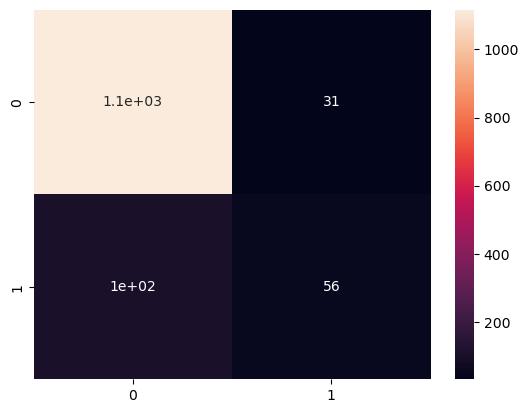

In [24]:
#plot confusion matrix
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)